Title

Description

Importing packages.

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

Importing data into pandas DataFrame.

In [2]:
df = pd.read_csv(r"fullDataFinal.csv", index_col=0)
df.columns = df.columns.str.strip()
# df.sample(5)

Run the block below to get the dataset with spaciotemporal *(SPT)* data only.

    | Latitude | Longitude | Remoteness | Discovery month | Weekend |

array([[<AxesSubplot:title={'center':'B'}>,
        <AxesSubplot:title={'center':'C'}>],
       [<AxesSubplot:title={'center':'D'}>,
        <AxesSubplot:title={'center':'E'}>],
       [<AxesSubplot:title={'center':'F'}>,
        <AxesSubplot:title={'center':'G'}>]], dtype=object)

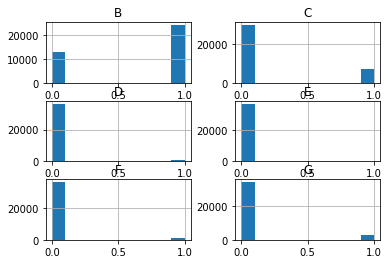

In [3]:
# Separate target variable (fire_size_class) from predictor variables.
dfTarget = df["fire_size_class"]
dfPredictor = df[["latitude", "longitude", "discovery_month", "weekday", "remoteness"]]

# First we one-hot encode the target class
dfTarget = pd.concat([dfTarget, pd.get_dummies(dfTarget)], axis=1)  # use get_dummies and concatenate the result to dfTarget
dfTarget.drop(["fire_size_class"], axis=1, inplace=True)  # and remove the old column
# print(dfTarget.sample(5))

# We want to make it binary classification between B and the larger fires
# To do this we can drop all classes other than B
# If B is 0 -> it's larger
dfTarget.drop(["C", "D", "E", "F", "G"], axis=1, inplace=True)


# Change Discovery_month to seasons.
    # March - May -> Spring
    # June - August -> Summer
    # September - November -> Fall
    # December - February -> Winter
seasons = {'Mar': 'Spring', 'Apr': 'Spring', 'May': 'Spring',
           'Jun': 'Summer', 'Jul': 'Summer', 'Aug': 'Summer',
           'Sep': 'Fall', 'Oct': 'Fall', 'Nov': 'Fall',
           'Dec': 'Winter', 'Jan': 'Winter', 'Feb': 'Winter'}

dfPredictor['season'] = dfPredictor['discovery_month'].apply(lambda x: seasons[x])
dfPredictor.drop(["discovery_month"], axis=1, inplace=True)


# One-hot encode the predictor features
# Seasons
dfPredictor = pd.concat([dfPredictor, pd.get_dummies(dfPredictor["season"])], axis=1)
dfPredictor.drop(["season"], axis=1, inplace=True)
# Weekday
dfPredictor = pd.concat([dfPredictor, pd.get_dummies(dfPredictor["weekday"])], axis=1)
dfPredictor.drop(["weekday"], axis=1, inplace=True)
dfPredictor.rename(columns={False:"is_weekend", True:"is_weekday"}, inplace=True)  # Rename the column to is_weekday. Just preference


# Scaling numerical data to 0-1 range.
dfPredictorScaled = pd.DataFrame(MinMaxScaler().fit_transform(dfPredictor[["latitude", "longitude", "remoteness"]]), columns=["latitude", "longitude", "remoteness"])

dfPredictor = dfPredictor.assign(**dfPredictorScaled.to_dict(orient="series"))  # replace the columns of the old df with the ones from the new one
# print(dfPredictor.sample(5))


# Save both dataframes as .csv files to "data_SPT_X.csv" and "data_SPT_y.csv"
dfTarget.to_csv(r'data\data_SPT_y.csv')
dfPredictor.to_csv(r'data\data_SPT_X.csv')

Run this block to get the dataset with the meteorological *(M)* features only.

    | Temperature | Wind speed | Humidity | Precipitation |

In [9]:
# Separate target variable (fire_size_class) from predictor variables.

dfTarget = df["fire_size_class"]
dfPredictor = df[["Temp", "Wind", "Humidity", "Precipitation"]]

# First we one-hot encode all of the classes
dfTarget = pd.concat([dfTarget, pd.get_dummies(dfTarget)], axis=1)  # use get_dummies and concatenate the result to dfTarget
dfTarget.drop(["fire_size_class"], axis=1, inplace=True)  # and remove the old column

# We want to make it binary classification between B and the larger fires
# To do this we can drop all classes other than B
# If B is 0 -> it's larger
dfTarget.drop(["C", "D", "E", "F", "G"], axis=1, inplace=True)


# Scaling numerical data to 0-1 range.
dfPredictorScaled = pd.DataFrame(MinMaxScaler().fit_transform(dfPredictor[["Temp", "Wind", "Humidity", "Precipitation"]]), columns=["Temp", "Wind", "Humidity", "Precipitation"])
dfPredictor = dfPredictor.assign(**dfPredictorScaled.to_dict(orient="series"))  # replace the columns of the old df with the ones from the new one


# Save both dataframes as .csv files to "data_M_X.csv" and "data_M_y.csv"
dfTarget.to_csv(r'data\data_M_y.csv')
dfPredictor.to_csv(r'data\data_M_X.csv')

Run this block to get the dataset with the topographic *(T)* features only.

    | Vegetation type | Elevation |

In [10]:
# Separate target variable (fire_size_class) from predictor variables.

dfTarget = df["fire_size_class"]
dfPredictor = df[["Vegetation", "elevation"]]

# First we one-hot encode all of the classes
dfTarget = pd.concat([dfTarget, pd.get_dummies(dfTarget)], axis=1)  # use get_dummies and concatenate the result to dfTarget
dfTarget.drop(["fire_size_class"], axis=1, inplace=True)  # and remove the old column

# We want to make it binary classification between B and the larger fires
# To do this we can drop all classes other than B
# If B is 0 -> it's larger
dfTarget.drop(["C", "D", "E", "F", "G"], axis=1, inplace=True)


# Changing categorical variables into one-hot encoded ones.
# Vegetation
dfPredictor = pd.concat([dfPredictor, pd.get_dummies(dfPredictor["Vegetation"], prefix="Veg", prefix_sep=" ")], axis=1)
dfPredictor.drop(["Vegetation"], axis=1, inplace=True)


# Save both dataframes as .csv files to "data_T_X.csv" and "data_T_y.csv"
dfTarget.to_csv(r'data\data_T_y.csv')
dfPredictor.to_csv(r'data\data_T_X.csv')

Run this block to get the dataset with the all the features.

    | Latitude | Longitude | Remoteness | Discovery month | Weekend | Temperature | Wind speed | Humidity | Precipitation | Vegetation type | Elevation |

In [11]:
# Separate target variable (fire_size_class) from predictor variables.

dfTarget = df["fire_size_class"]
dfPredictor = df[["latitude", "longitude", "discovery_month", "weekday", "Vegetation", "remoteness", "elevation", "Temp", "Wind", "Humidity", "Precipitation"]]

# First we one-hot encode all of the classes
dfTarget = pd.concat([dfTarget, pd.get_dummies(dfTarget)], axis=1)  # use get_dummies and concatenate the result to dfTarget
dfTarget.drop(["fire_size_class"], axis=1, inplace=True)  # and remove the old column

# We want to make it binary classification between B and the larger fires
# To do this we can drop all classes other than B
# If B is 0 -> it's larger
dfTarget.drop(["C", "D", "E", "F", "G"], axis=1, inplace=True)


# Change Discovery_month to seasons.
    # March - May -> Spring
    # June - August -> Summer
    # September - November -> Fall
    # December - February -> Winter
seasons = {'Mar': 'Spring', 'Apr': 'Spring', 'May': 'Spring',
           'Jun': 'Summer', 'Jul': 'Summer', 'Aug': 'Summer',
           'Sep': 'Fall', 'Oct': 'Fall', 'Nov': 'Fall',
           'Dec': 'Winter', 'Jan': 'Winter', 'Feb': 'Winter'}

dfPredictor['season'] = dfPredictor['discovery_month'].apply(lambda x: seasons[x])
dfPredictor.drop(["discovery_month"], axis=1, inplace=True)


# Changing categorical variables into one-hot encoded ones.
# Vegetation
dfPredictor = pd.concat([dfPredictor, pd.get_dummies(dfPredictor["Vegetation"], prefix="Veg", prefix_sep=" ")], axis=1)
dfPredictor.drop(["Vegetation"], axis=1, inplace=True)

# Seasons
dfPredictor = pd.concat([dfPredictor, pd.get_dummies(dfPredictor["season"])], axis=1)
dfPredictor.drop(["season"], axis=1, inplace=True)

# Weekday
dfPredictor = pd.concat([dfPredictor, pd.get_dummies(dfPredictor["weekday"])], axis=1)
dfPredictor.drop(["weekday"], axis=1, inplace=True)
dfPredictor.rename(columns={False:"is_weekend", True:"is_weekday"}, inplace=True) # Rename the column to is_weekday. Just preference


# Scaling numerical data to 0-1 range.
dfPredictorScaled = pd.DataFrame(MinMaxScaler().fit_transform(dfPredictor[["latitude", "longitude", "remoteness", "elevation", "Temp", "Wind", "Humidity", "Precipitation"]]), columns=["latitude", "longitude", "remoteness", "elevation", "Temp", "Wind", "Humidity", "Precipitation"])
dfPredictor = dfPredictor.assign(**dfPredictorScaled.to_dict(orient="series"))  # replace the columns of the old df with the ones from the new one


# Save both dataframes as .csv files to "data_Full_X.csv" and "data_Full_y.csv"
dfTarget.to_csv(r'data\data_Full_y.csv')
dfPredictor.to_csv(r'data\data_Full_X.csv')
